In [10]:
import tensorflow as tf
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Dropout
import random
from sklearn.model_selection import train_test_split

In [2]:
data1 = pd.read_csv("classification-of-handwritten-letters/letters.csv")
file1 = data1['file']
letters1 = data1['letter']
back1 = data1['background']
data2 = pd.read_csv("classification-of-handwritten-letters/letters2.csv")
file2 = data2['file']
letters2 = data2['letter']
back2 = data2['background']
data3 = pd.read_csv("classification-of-handwritten-letters/letters3.csv")
file3 = data3['file']
letters3 = data3['letter']
back3 = data3['background']

In [3]:
letters = pd.concat((letters1, letters2), axis=0, ignore_index=True)
letters = pd.concat((letters, letters3), axis=0, ignore_index=True)
len(letters)

14190

In [4]:
f = h5py.File('classification-of-handwritten-letters/LetterColorImages_123.h5', 'r')
# List all groups
keys = list(f.keys())
backgrounds = np.array(f[keys[0]])
tensors = np.array(f[keys[1]])
targets = np.array(f[keys[2]])
tensors = tensors.astype('float32')/255
print(set(targets))

In [8]:
cat_targets = keras.utils.to_categorical(np.array(targets-1), 33)
cat_targets.shape

(14190, 33)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(tensors, cat_targets, 
                                                    test_size = 0.2, 
                                                    random_state = 1)
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]

In [3]:
train = pd.read_csv('../Downloads/emnist-balanced-train.csv', header=None)
test = pd.read_csv('../Downloads/emnist-balanced-test.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(18800, 785)

In [4]:
train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

In [7]:
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
del train, test

(112800, 784)

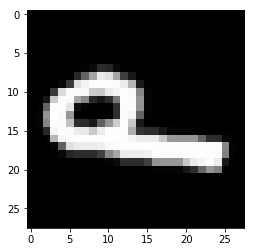

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data[45].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [17]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255

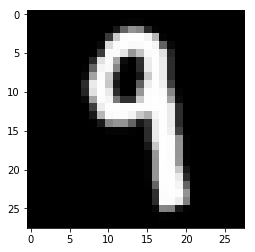

In [18]:
plt.imshow(train_data[45].reshape([28, 28]), cmap='Greys_r')
plt.show()

(112800, 784)

In [20]:
train_data = np.array(train_data).reshape(-1,28,28,1)

In [3]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))   
model.add(Flatten())
model.add(Dense(47))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [25]:
train_data.shape

(112800, 28, 28, 1)

In [26]:
model.fit(train_data,train_labels,epochs=5,validation_split=0.1)

Train on 101520 samples, validate on 11280 samples
Epoch 1/5
 94560/101520 [==========================>...] - ETA: 11s - loss: 1.4315 - acc: 0.5632

KeyboardInterrupt: 

In [13]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
## consider using this for more variety
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

# if already ran this above, no need to do it again
# X, y = img_label_load(train_data_path)
# print("X.shape: ", X.shape)

training_data_generator = data_generator.flow(train_data, train_labels, subset='training')
validation_data_generator = data_generator.flow(train_data, train_labels, subset='validation')
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=5, # can change epochs to 10
                              validation_data=validation_data_generator)

Epoch 1/5
500/500 [==============================] - 34s 69ms/step - loss: 2.6000 - acc: 0.2774 - val_loss: 1.4394 - val_acc: 0.5687
Epoch 2/5
500/500 [==============================] - 34s 68ms/step - loss: 1.4253 - acc: 0.5524 - val_loss: 1.0098 - val_acc: 0.6797
Epoch 3/5
500/500 [==============================] - 35s 70ms/step - loss: 1.1751 - acc: 0.6286 - val_loss: 0.8622 - val_acc: 0.7199
Epoch 4/5
500/500 [==============================] - 34s 68ms/step - loss: 1.0193 - acc: 0.6719 - val_loss: 0.7907 - val_acc: 0.7409
Epoch 5/5
500/500 [==============================] - 33s 67ms/step - loss: 0.9640 - acc: 0.6861 - val_loss: 0.7394 - val_acc: 0.7597


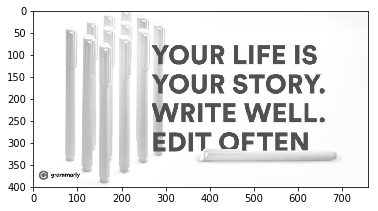

(400, 760)
<class 'numpy.ndarray'>


In [5]:
datadir = "para.jpg"

img_array = cv2.imread(datadir,cv2.IMREAD_GRAYSCALE)
# img_array = cv2.resize(img_array,(150,150))
plt.imshow(img_array,cmap="gray")
plt.show()
print(img_array.shape)
print(type(img_array))
# img_array = cv2.resize(img_array)

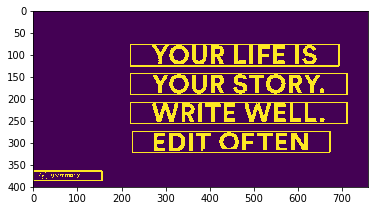

[array([[[  0, 360]],

       [[  0, 388]],

       [[206, 388]],

       [[207, 387]],

       [[207, 361]],

       [[206, 360]]], dtype=int32), array([[[176, 271]],

       [[175, 272]],

       [[175, 323]],

       [[176, 324]],

       [[723, 324]],

       [[724, 323]],

       [[724, 272]],

       [[723, 271]]], dtype=int32), array([[[172, 206]],

       [[171, 207]],

       [[171, 258]],

       [[172, 259]],

       [[759, 259]],

       [[759, 206]]], dtype=int32), array([[[172, 140]],

       [[171, 141]],

       [[171, 193]],

       [[172, 194]],

       [[759, 194]],

       [[759, 140]]], dtype=int32), array([[[172,  74]],

       [[171,  75]],

       [[171, 128]],

       [[172, 129]],

       [[744, 129]],

       [[745, 128]],

       [[745,  75]],

       [[744,  74]]], dtype=int32)]


In [7]:
gray = img_array
# cv2.imshow('gray',gray)
# cv2.waitKey(0)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()
# cv2.waitKey(0)

kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# plt.imshow(img_dilation)
# plt.show()
# cv2.imshow('dilated',img_dilation)
# cv2.waitKey(0)

im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(ctrs)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[1])
# boundingBoxes = [cv2.boundingRect(c) for c in ctrs]
# (cnts, boundingBoxes) = zip(*sorted(zip(ctrs, boundingBoxes),
#         key=lambda b:b[1][0], reverse=False))
# sorted_ctrs = sorted(ctrs, key = cv2.contourArea, reverse = True)[:10]
# list_images = []
# count = 0
datadir1 = "/home/sabu/handwriting recognition/save_images_lines"
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)

    roi = img_array[y:y+h, x:x+w]
#     count+=1
#     list_images.append(roi)
#     print(type(roi))
#     print(roi.shape)
    NAME = "seg_{}.jpg".format(int(time.time()))
    temp = os.path.join(datadir1,NAME)
    cv2.imwrite(temp,roi)
    cv2.imshow('segment no:'+str(i),roi)
    cv2.rectangle(img_array,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(1000)

cv2.imshow('marked areas',img_array)
cv2.waitKey(1000)
cv2.destroyAllWindows()
plt.show()

In [30]:
datadir1 = "save_images_lines"
datadir3 = "/home/sabu/handwriting recognition/save_images_words"
list1 = []
for l in os.listdir(datadir1):
    list1.append(l)
list1.sort()

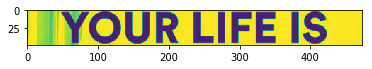

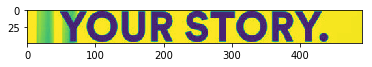

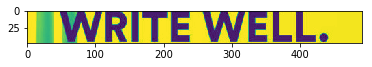

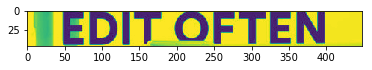

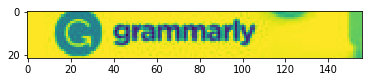

In [31]:
# test_array = cv2.resize(img_array,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
datadir1 = "save_images_lines"
datadir3 = "/home/sabu/handwriting recognition/save_images_words"
def testing_data1():
    for k in list1:
        test_array = cv2.imread(os.path.join(datadir1,k),cv2.IMREAD_GRAYSCALE)
        plt.imshow(test_array)
        plt.show()
        ret,thresh = cv2.threshold(test_array,127,255,cv2.THRESH_BINARY_INV)
#         test_array = cv2.resize(test_array,(150,150))
        #         test_array = cv2.resize(test_array,(150,150))
        krnl = np.ones((5,20), np.uint8)
        img_dilate = cv2.dilate(thresh, krnl, iterations=1)
        im4,cnts, hierarchy = cv2.findContours(img_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        sorted_cnts = sorted(cnts, key=lambda cnt: cv2.boundingRect(cnt)[0])
        
        for j, cnt1 in enumerate(sorted_cnts):
            x, y, w, h = cv2.boundingRect(cnt1)

            region_int = test_array[y:y+h, x:x+w]
            NAME1 = "seg_{}.jpg".format(int(time.time()))
            temp1 = os.path.join(datadir3,NAME1)
            cv2.imwrite(temp1,region_int)
#             list_images1.append(region_int)
            cv2.imshow('segment no:'+str(j),region_int)
            cv2.rectangle(test_array,(x,y),( x + w, y + h ),(90,0,255),2)
            cv2.waitKey(1000)

        cv2.imshow('marked areas',test_array)
        cv2.waitKey(1000)
        cv2.destroyAllWindows()            
testing_data1()

In [32]:
datadir4 = "save_images_words"
list2 = []
for n in os.listdir(datadir4):
    list2.append(n)
list2.sort()
print(list2)

['seg_1547985383.jpg', 'seg_1547985384.jpg', 'seg_1547985385.jpg', 'seg_1547985387.jpg', 'seg_1547985388.jpg', 'seg_1547985390.jpg', 'seg_1547985391.jpg', 'seg_1547985393.jpg', 'seg_1547985394.jpg', 'seg_1547985397.jpg']


In [33]:
list_images = []
new = []
datadir4 = "save_images_words"

def testing_data2():
    for m in list2:
        temp_array = cv2.imread(os.path.join(datadir4,m),cv2.IMREAD_GRAYSCALE)
        ret2,thresh2 = cv2.threshold(temp_array,127,255,cv2.THRESH_BINARY_INV)
        krnl2 = np.ones((5,5), np.uint8)
        img_dilate2 = cv2.dilate(thresh2, krnl2, iterations=1)
        im5,cnts2, hierarchy2 = cv2.findContours(img_dilate2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        sorted_cnts2 = sorted(cnts2, key=lambda cnt2: cv2.boundingRect(cnt2)[0])
        
        for j, cnt2 in enumerate(sorted_cnts2):
            x, y, w, h = cv2.boundingRect(cnt2)

            region_int2 = temp_array[y:y+h, x:x+w]
            new.append(region_int2)
#             plt.imshow(region_int2)
#             plt.show()
            cv2.imshow('segment no:'+str(j),region_int2)
            cv2.rectangle(temp_array,(x,y),( x + w, y + h ),(90,0,255),2)
            cv2.waitKey(1000)
        list_images.append(new)
        cv2.imshow('marked areas',temp_array)
        cv2.waitKey(1000)
        cv2.destroyAllWindows()  
testing_data2()

In [97]:
print(list_images)
list_images = np.array(list_images)

[[array([[ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90, 255, ..., 255, 255,  90],
       ...,
       [ 90,  90, 255, ..., 255, 255,  90],
       [ 90,  90, 255, ..., 255, 255,  90],
       [ 90,  90,  90, ...,  90,  90,  90]], dtype=uint8)
  array([[ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90, 255, ..., 255, 254,  90],
       ...,
       [ 90,  90, 255, ..., 255, 254,  90],
       [ 90,  90, 255, ..., 251, 246,  90],
       [ 90,  90,  90, ...,  90,  90,  90]], dtype=uint8)
  array([[ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90, 255, ..., 255, 255,  90],
       ...,
       [ 90,  90, 255, ..., 232, 255,  90],
       [ 90,  90, 252, ..., 255, 251,  90],
       [ 90,  90,  90, ...,  90,  90,  90]], dtype=uint8)
  ...
  array([[ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90,  90, ...,  90,  90,  90],
       [ 90,  90, 255, ..., 

In [10]:
list_images.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
for row in list_images:
    for list_in in row:
        model.predict([list_in])


In [19]:
test_data = np.array(test_data).reshape(-1,28,28,1)

In [20]:
predicitions = model.predict([test_data])

In [34]:
print(np.argmax(predicitions[5]))

33


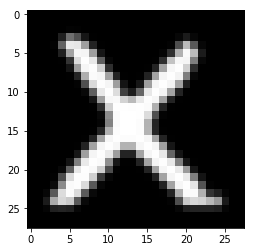

In [35]:
plt.imshow(test_data[5].reshape([28,28]),cmap="gray")
plt.show()